In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from fbprophet import Prophet
from datetime import datetime

In [2]:
path = "c:/Windows/Fonts/malgun.ttf"
import platform
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')    

plt.rcParams['axes.unicode_minus'] = False

In [3]:
pinkwink_web = pd.read_csv('../data/08. PinkWink Web Traffic.csv', encoding='utf-8', thousands=',', names=['date','hit'], index_col=0)
pinkwink_web = pinkwink_web[pinkwink_web['hit'].notnull()]
pinkwink_web.head()

,hit
date,
16. 7. 1.,766.0
16. 7. 2.,377.0
16. 7. 3.,427.0
16. 7. 4.,902.0
16. 7. 5.,850.0


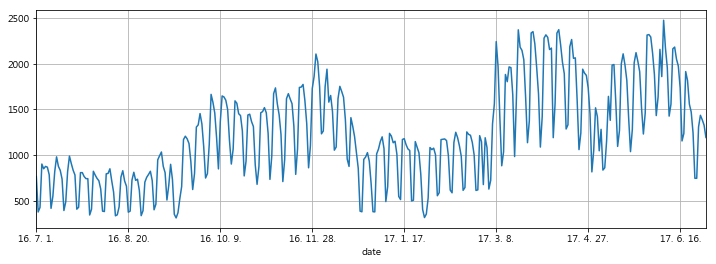

In [4]:
pinkwink_web['hit'].plot(figsize=(12,4), grid=True);

In [5]:
time = np.arange(0,len(pinkwink_web))
traffic = pinkwink_web['hit'].values
fx = np.linspace(0, time[-1], 1000)

In [6]:
def error(f, x, y):
    return np.sqrt(np.mean((f(x)-y)**2))
# 모델 적합성 확인위해 에러함수 정의

In [7]:
f1p = np.polyfit(time, traffic, 1)
f1 = np.poly1d(f1p)

f2p = np.polyfit(time, traffic, 2)
f2 = np.poly1d(f2p)

f3p = np.polyfit(time, traffic, 3)
f3 = np.poly1d(f3p)

f15p = np.polyfit(time, traffic, 15)
f15 = np.poly1d(f15p)

print(error(f1, time, traffic))
print(error(f2, time, traffic))
print(error(f3, time, traffic))
print(error(f15, time, traffic))
# 1 2 3 15차 함수로 표현하여 에러 확인

430.8597308110963
430.62841018946943
429.53280466762925
330.47773026564636


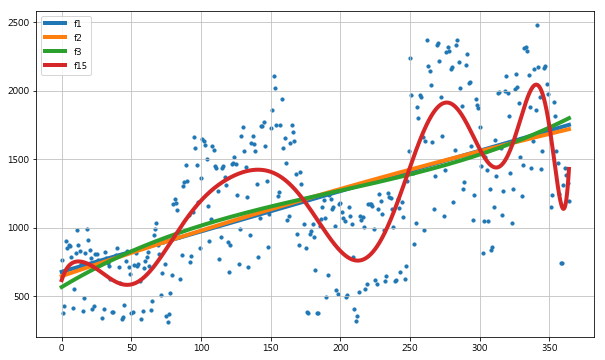

In [8]:
plt.figure(figsize=(10,6))
plt.scatter(time, traffic, s=10)

plt.plot(fx, f1(fx), lw=4, label='f1')
plt.plot(fx, f2(fx), lw=4, label='f2')
plt.plot(fx, f3(fx), lw=4, label='f3')
plt.plot(fx, f15(fx), lw=4, label='f15')

plt.grid(True, linestyle='-', color='0.75')
plt.legend(loc=2)
plt.show()

In [9]:
df = pd.DataFrame({'ds':pinkwink_web.index, 'y':pinkwink_web['hit']})
df.reset_index(inplace=True)
df['ds'] =  pd.to_datetime(df['ds'], format="%y. %m. %d.")
del df['date']

m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df);
# to_datetime 함수를 이용해서 날짜로 선언
# Prophet함수 주기성 연단위로 설정

In [10]:
future = m.make_future_dataframe(periods=60)
future.tail()
# 이후 60일간의 데이터를 예측

,ds
420,2017-08-25
421,2017-08-26
422,2017-08-27
423,2017-08-28
424,2017-08-29


In [11]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
420,2017-08-25,911.790860,689.020078,1113.751720
421,2017-08-26,496.917939,292.379301,705.183873
422,2017-08-27,629.458439,407.789792,848.746325
423,2017-08-28,1181.938386,983.010620,1403.941389
424,2017-08-29,1217.864960,1010.144924,1437.661568


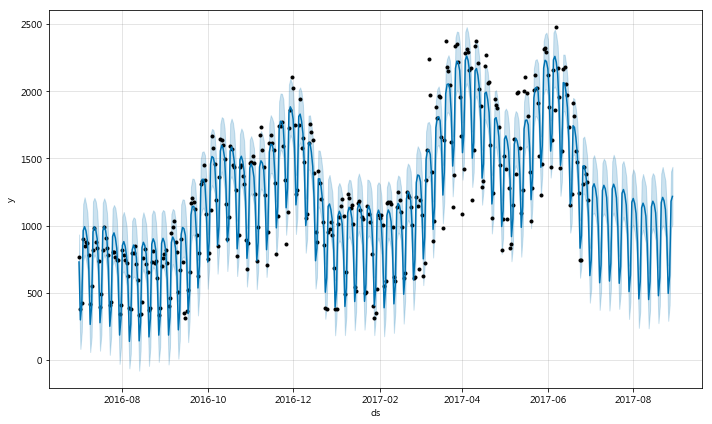

In [12]:
m.plot(forecast);

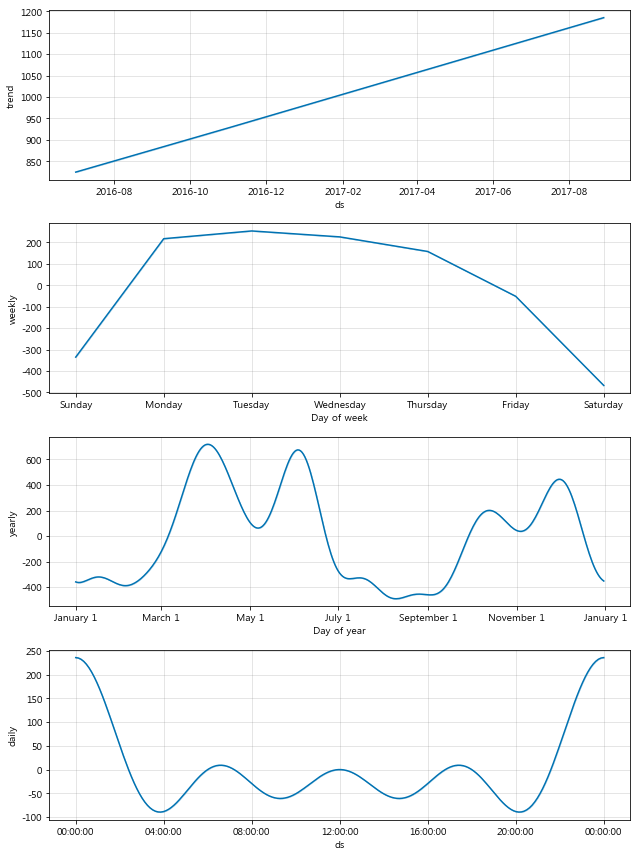

In [13]:
m.plot_components(forecast);
# 전체적인 경향(직선)

In [14]:
from pandas_datareader import data
import fix_yahoo_finance as yf
yf.pdr_override()

start_date = '1990-1-1' 
end_date = '2017-6-30' 
KIA = data.get_data_yahoo('000270.KS', start_date, end_date)
KIA.head()
# 1990-1-1 부터 2017-6-30 까지 KIA자동차 주식 데이터

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-04,7404.520020,7665.240234,7300.229980,7665.240234,5803.053711,636300
2000-01-05,7404.520020,7404.520020,7248.089844,7248.089844,5487.245605,686100
2000-01-06,7331.520020,7519.240234,6935.220215,6935.220215,5250.383789,379000
2000-01-07,6987.359863,7143.799805,6778.790039,6778.790039,5131.958008,701400
2000-01-10,6841.359863,7102.080078,6810.069824,7091.649902,5368.811523,1076700


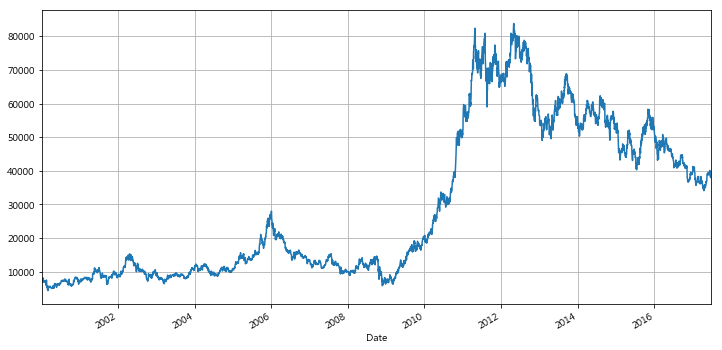

In [15]:
KIA['Close'].plot(figsize=(12,6), grid=True);

In [16]:
KIA_trunc = KIA[:'2016-12-31']
KIA_trunc

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-04,7404.520020,7665.240234,7300.229980,7665.240234,5803.053711,636300
2000-01-05,7404.520020,7404.520020,7248.089844,7248.089844,5487.245605,686100
2000-01-06,7331.520020,7519.240234,6935.220215,6935.220215,5250.383789,379000
2000-01-07,6987.359863,7143.799805,6778.790039,6778.790039,5131.958008,701400
2000-01-10,6841.359863,7102.080078,6810.069824,7091.649902,5368.811523,1076700
2000-01-11,7143.799805,7717.390137,7143.799805,7717.390137,5842.535156,1127200
2000-01-12,7717.390137,8447.410156,7300.229980,7508.810059,5684.626465,1606600
2000-01-13,7696.529785,7696.529785,7195.939941,7195.939941,5447.766113,702700
2000-01-14,7195.939941,7508.810059,6987.359863,7508.810059,5684.626465,843900


In [17]:
df = pd.DataFrame({'ds':KIA_trunc.index, 'y':KIA_trunc['Close']})
df.reset_index(inplace=True)
del df['Date']
df.head()

,ds,y
0,2000-01-04,7665.240234
1,2000-01-05,7248.089844
2,2000-01-06,6935.220215
3,2000-01-07,6778.790039
4,2000-01-10,7091.649902


In [18]:
m = Prophet(daily_seasonality=True)
m.fit(df);

In [19]:
future = m.make_future_dataframe(periods=365)
future.tail()
# 이후 365일(1년) 데이터 예측

,ds
4578,2017-12-25
4579,2017-12-26
4580,2017-12-27
4581,2017-12-28
4582,2017-12-29


In [20]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
4578,2017-12-25,35680.001394,26721.134039,43712.927741
4579,2017-12-26,35725.239064,26892.156934,44848.189164
4580,2017-12-27,35694.063814,26217.862656,44552.505113
4581,2017-12-28,35659.734142,27106.337142,43727.469284
4582,2017-12-29,35595.920632,27058.686983,44531.926068


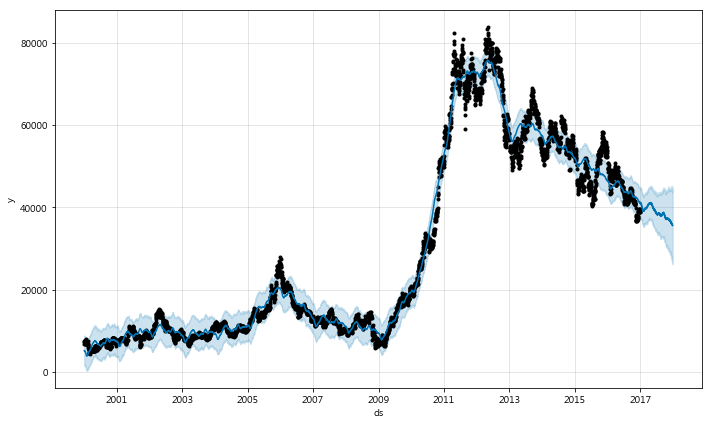

In [21]:
m.plot(forecast);

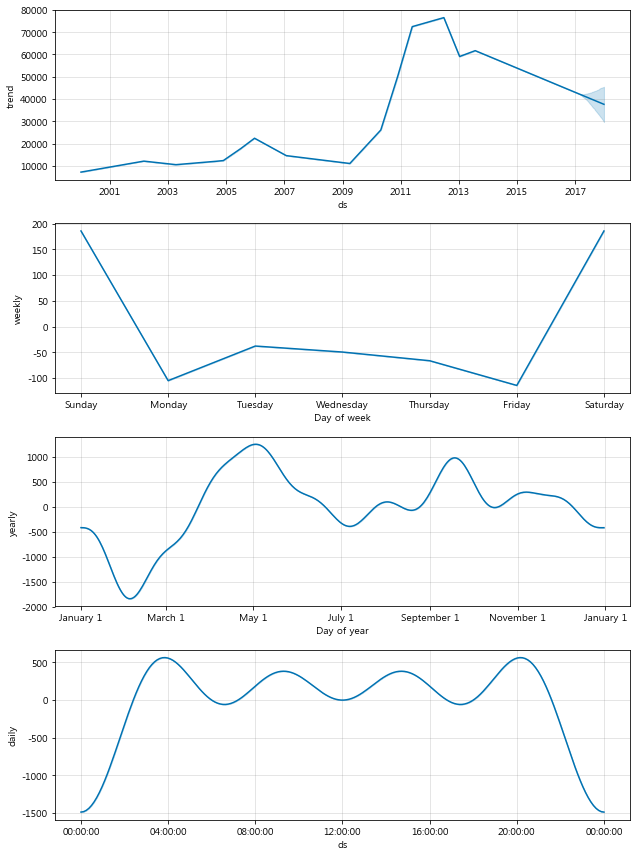

In [22]:
m.plot_components(forecast);

[*********************100%***********************]  1 of 1 downloaded


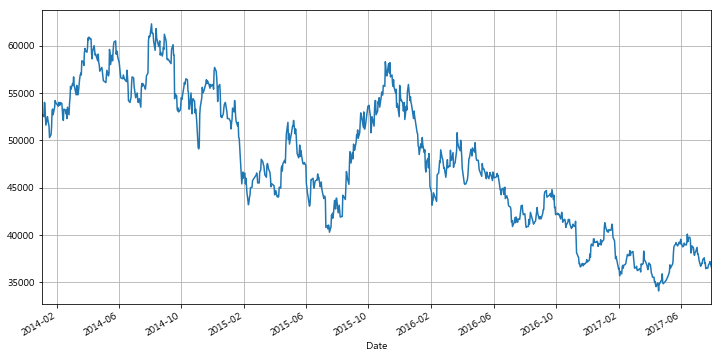

In [23]:
start_date = '2014-1-1' 
end_date = '2017-7-31' 
KIA = data.get_data_yahoo('000270.KS', start_date, end_date)
KIA['Close'].plot(figsize=(12,6), grid=True);

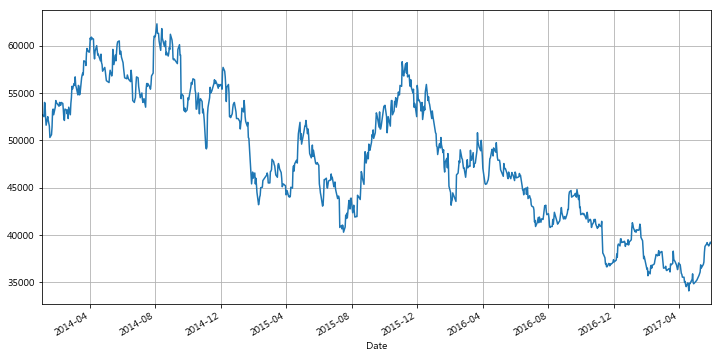

In [24]:
KIA_trunc = KIA[:'2017-05-31']
KIA_trunc['Close'].plot(figsize=(12,6), grid=True);

In [25]:
df = pd.DataFrame({'ds':KIA_trunc.index, 'y':KIA_trunc['Close']})
df.reset_index(inplace=True)
del df['Date']

In [26]:
m = Prophet(daily_seasonality=True)
m.fit(df);

In [27]:
future = m.make_future_dataframe(periods=61)
future.tail()

,ds
897,2017-07-27
898,2017-07-28
899,2017-07-29
900,2017-07-30
901,2017-07-31


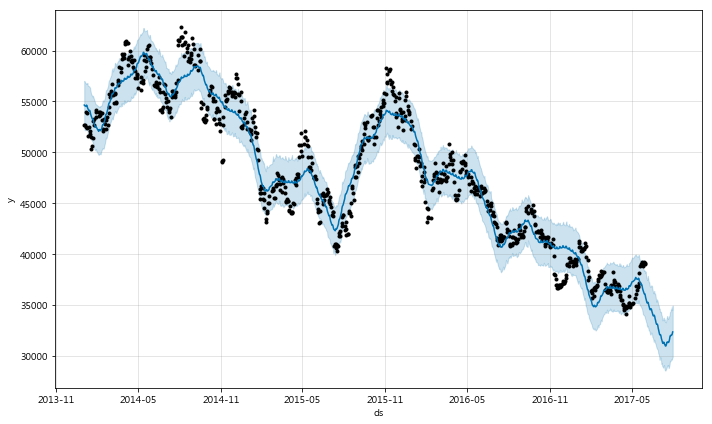

In [28]:
forecast = m.predict(future)
m.plot(forecast);

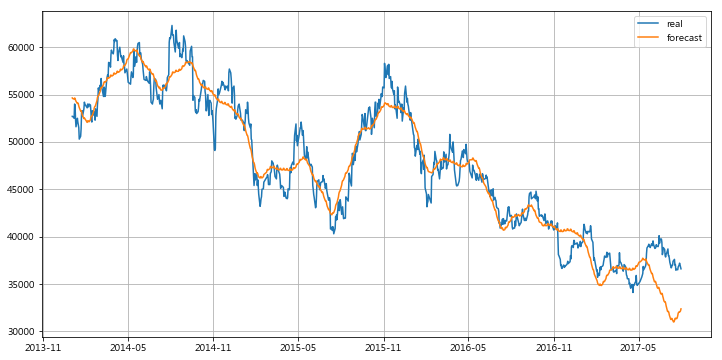

In [29]:
plt.figure(figsize=(12,6))
plt.plot(KIA.index, KIA['Close'], label='real')
plt.plot(forecast['ds'], forecast['yhat'], label='forecast')
plt.grid()
plt.legend()
plt.show()
# real(실제값)과 forecast(예측값)을 동시에 표현

In [30]:
df = pd.read_csv('../data/08. example_wp_R.csv')
df['y'] = np.log(df['y'])
df

,ds,y
0,2008-01-30,5.976351
1,2008-01-16,6.049733
2,2008-01-17,6.011267
3,2008-01-14,5.953243
4,2008-01-15,5.910797
5,2008-01-12,5.407172
6,2008-01-13,5.323010
7,2008-01-10,5.880533
8,2008-01-11,5.645447
9,2008-01-18,5.958425


In [31]:
df['cap'] = 8.5

In [32]:
m = Prophet(growth='logistic', daily_seasonality=True)
m.fit(df)
# 주기성을 띠면서 점점 성장하는 모습의 로그함수

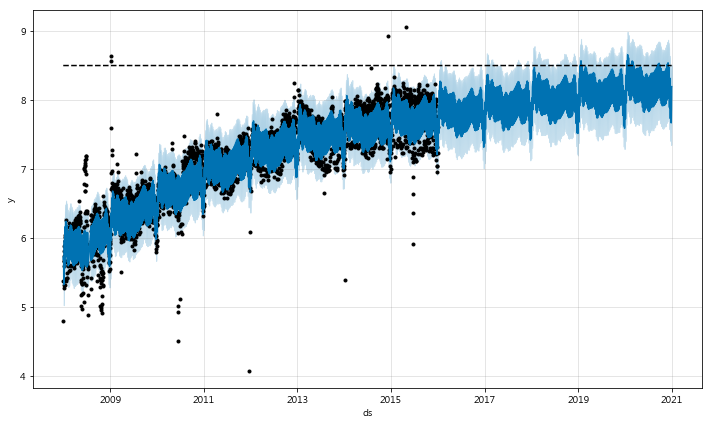

In [33]:
future = m.make_future_dataframe(periods=1826)
future['cap'] = 8.5
fcst = m.predict(future)
m.plot(fcst);
# cap 으로 8.5에 선 표시

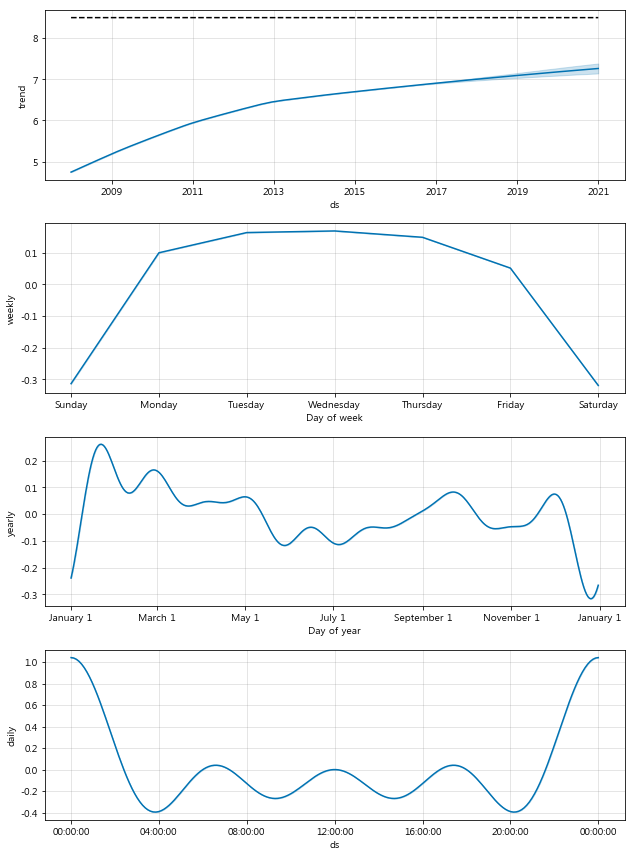

In [34]:
forecast = m.predict(future)
m.plot_components(forecast);